# Assignment #1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Part 1: hw1_est_data.csv

In [2]:
# setting the url as a variable to read in the data on next line
test_data_url = r'https://raw.githubusercontent.com/choct155/telling_stories_with_data/master/assignments/data/hw1_test_data.csv'

In [3]:
# reading in the data
test_data_df = pd.read_csv(test_data_url, sep=',')

In [4]:
#checking the first five rows
test_data_df.head()

,Unnamed: 0,x,y
0,0,0.969386,0.050518
1,1,0.543107,0.795078
2,2,0.563839,0.266660
3,3,0.158021,0.596197
4,4,0.160360,0.574742


Text(0,0.5,'Y')

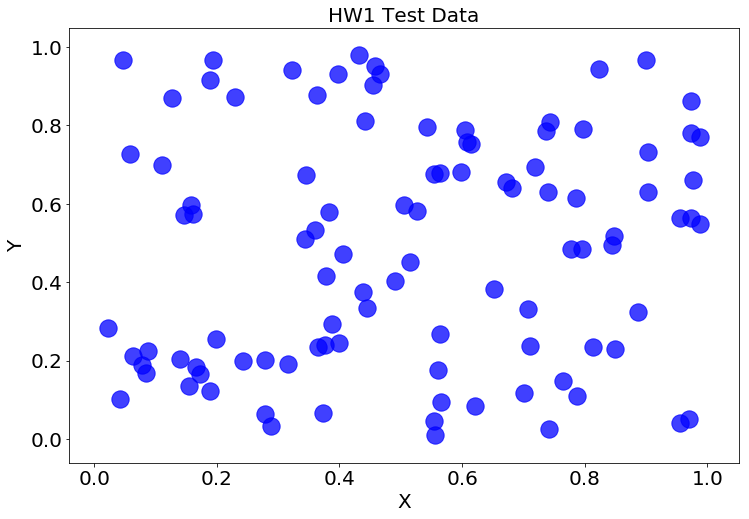

In [5]:
# setting x and y inputs
x = test_data_df['x']
y = test_data_df['y']

# increasing font size for this chart, and all subsequent matplotlib figures
mpl.rcParams['font.size'] = 20

#creating figure
fig, ax = plt.subplots(figsize=(12,8))

ax.scatter(x, y, s=300, c='b', alpha=.75)

ax.set_title('HW1 Test Data', fontsize=20)
ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)

## Part Two: Simulating Data

In [6]:
import numpy as np

### Bell-Shaped Curve

In [7]:
# creating 1,000 random variables 
x_values = np.random.normal(size=10000)

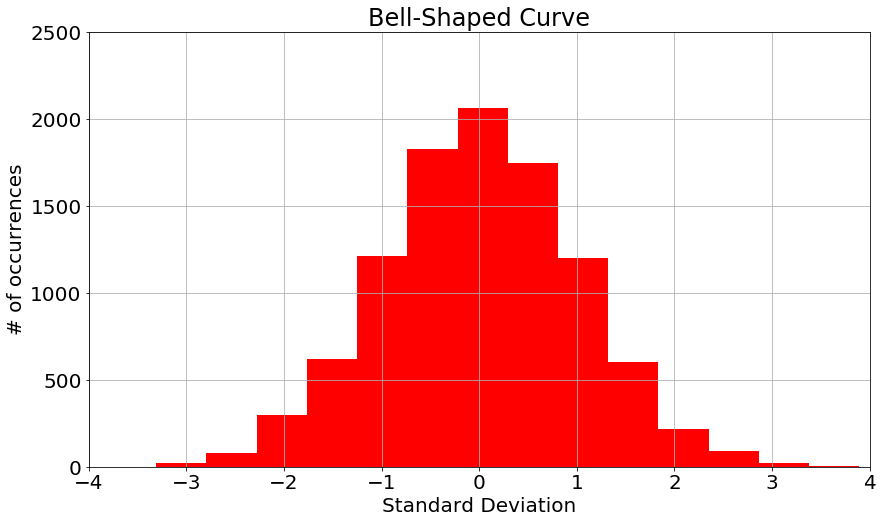

In [8]:
# creating histogram
fig, ax = plt.subplots(figsize = (14,8))

n, bins, patches = ax.hist(x_values, bins = 14, facecolor = 'r')

ax.set_xlabel('Standard Deviation')
ax.set_ylabel('# of occurrences')
ax.set_title('Bell-Shaped Curve')
plt.axis([-4, 4, 0, 2500])
ax.grid(True)

# Part Three: Timeseries Data from BLS API

In [9]:
# Methods for display of arbitrary HTML
from IPython.display import HTML

# Methods for capture of secure info (like registration keys)
import getpass

# Methods for capture of data returned by GET request
import requests

# Methods for turning API result into pandas DataFrame
import json
import numpy as np
import pandas as pd

# Methods for plotting
import bokeh.plotting as bp

# Display result in an iframe
def show_iframe(url, height=400, width=1000):
    display_string = '<iframe src={url} width={w} height={h}></iframe>'.format(url=url, w=width, h=height)
    print(display_string)
    return HTML(display_string)

show_iframe('https://api.bls.gov/publicAPI/v1/timeseries/data/CFU0000008000', height=100)

<iframe src=https://api.bls.gov/publicAPI/v1/timeseries/data/CFU0000008000 width=1000 height=100></iframe>


### Getting registration key

In [10]:
show_iframe('https://data.bls.gov/registrationEngine/')

<iframe src=https://data.bls.gov/registrationEngine/ width=1000 height=400></iframe>


In [11]:
# Capture key
reg_key = getpass.getpass('Enter Registration Key: ')

Enter Registration Key: ········


### Picking data

In [12]:
show_iframe('https://www.bls.gov/help/hlpforma.htm#CE', height=400)

<iframe src=https://www.bls.gov/help/hlpforma.htm#CE width=1000 height=400></iframe>


Series choice:

Prefix = CE

Seasonal adjustment = S

Super Sector & Industry Code = 00000000 (Total nonfarm)

Data Type code = 01 (All employees, thousands)

Series = CES0000000001

In [13]:
# setting series variable using parameters listed above
series = 'CES0000000001'

In [14]:
def capture_request(series, start, end, key=reg_key):
    # Define base URL (for v2)
    url = 'https://api.bls.gov/publicAPI/v2/timeseries/data/'
    # Concatenate registration key
    url += '?registrationkey={key}'.format(key=key)
    # Cast data request as JSON
    data = json.dumps({
        "seriesid": [series],
        "startyear": str(start),
        "endyear": str(end)
    })
    # Capture content type of request
    headers = {
        "Content-type": "application/json"
    }
    # Request data
    result = requests.post(url, data=data, headers=headers)
    return json.loads(result.text)

# Capture and display JSON representation of the data
json_data = capture_request(series, 2008, 2017)

#json_data

In [15]:
# Convert to DF
df_data = pd.DataFrame(json_data['Results']['series'][0]['data'])
print(df_data)

                                  footnotes period periodName   value  year
0    [{'code': 'P', 'text': 'preliminary'}]    M12   December  147380  2017
1    [{'code': 'P', 'text': 'preliminary'}]    M11   November  147232  2017
2                                      [{}]    M10    October  146980  2017
3                                      [{}]    M09  September  146769  2017
4                                      [{}]    M08     August  146731  2017
5                                      [{}]    M07       July  146523  2017
6                                      [{}]    M06       June  146385  2017
7                                      [{}]    M05        May  146175  2017
8                                      [{}]    M04      April  146030  2017
9                                      [{}]    M03      March  145823  2017
10                                     [{}]    M02   February  145773  2017
11                                     [{}]    M01    January  145541  2017
12          

In [16]:
# Retain only the periodName, value, years
df_sub = df_data[['periodName', 'year', 'value']]

In [17]:
# changing 'periodName' to 'month'
df_sub.columns = ['month', 'year', 'value']

In [18]:
df_sub

,month,year,value
0,December,2017,147380
1,November,2017,147232
2,October,2017,146980
3,September,2017,146769
4,August,2017,146731
5,July,2017,146523
6,June,2017,146385
7,May,2017,146175
8,April,2017,146030
9,March,2017,145823


In [19]:
# creating dictionary with month matched to corresponding number
m = {'December':'12', 'November':'11', 'October':'10', 'September':'9', 'August':'8', 'July':'7', 'June':'6', 'May':'5',\
    'April':'4', 'March':'3', 'February':'2', 'January':'1'}

# mapping month number to month
df_sub.month = df_sub.month.map(m)

/Applications/anaconda/lib/python3.6/site-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [20]:
# creating a new column that combines year and month in YYYY-MM format
df_sub['date'] = df_sub['year'] + '-' + df_sub['month']

/Applications/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [21]:
df_sub

,month,year,value,date
0,12,2017,147380,2017-12
1,11,2017,147232,2017-11
2,10,2017,146980,2017-10
3,9,2017,146769,2017-9
4,8,2017,146731,2017-8
5,7,2017,146523,2017-7
6,6,2017,146385,2017-6
7,5,2017,146175,2017-5
8,4,2017,146030,2017-4
9,3,2017,145823,2017-3


In [22]:
# setting the 'date' column as the index
df_sub['date'] = pd.to_datetime(df_sub['date'], format='%Y-%m')
df_sub.set_index('date', inplace=True)

/Applications/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [23]:
# removing 'month' and 'year' columns to simplify
del df_sub['month']
del df_sub['year']

In [24]:
# setting 'value' as integer
df_sub = df_sub.astype(int)

In [25]:
df_sub

,value
date,
2017-12-01,147380
2017-11-01,147232
2017-10-01,146980
2017-09-01,146769
2017-08-01,146731
2017-07-01,146523
2017-06-01,146385
2017-05-01,146175
2017-04-01,146030


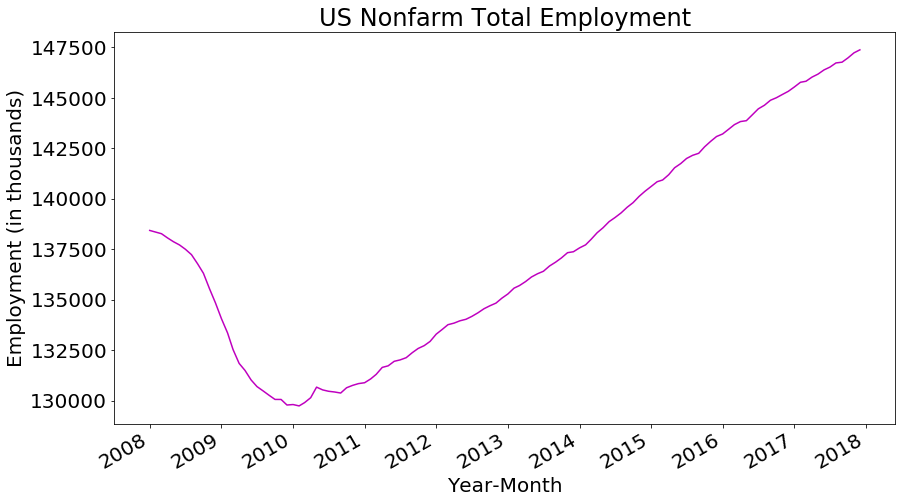

In [26]:
# creating figure for US Nonfarm Total Employment
fig, ax = plt.subplots(figsize = (14,8))

ax.plot(df_sub.index, df_sub.value, 'm-')

ax.set_xlabel('Year-Month')
ax.set_ylabel('Employment (in thousands)')
ax.set_title('US Nonfarm Total Employment')
#ax.grid(True)
fig.autofmt_xdate()